In [1]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

model = RandomForestRegressor(max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
scaler = StandardScaler()
# pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])

In [2]:
df = pd.read_csv("../test_data/new leaky wave/S11_Data_combined.csv").sample(5000)
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
# input_x.rename(columns={'inset_dist [mm]': 'inset_dist', 'L [mm]': 'L', 'sub_thick [mm]': 'sub_thick', 'W [mm]': 'W', 'W0 [mm]': 'W0', 'y0 [mm]': 'y0', 'Freq [GHz]': 'Freq'}, inplace=True)
input_y = df[['dB(S(1,1)) []']]

In [3]:
x_scaled = scaler.fit_transform(input_x)

In [4]:
model = model.fit(x_scaled, input_y.values.ravel())

In [5]:
explainer = shap.Explainer(model, x_scaled)

In [6]:
shap_values = explainer(x_scaled,check_additivity=False)

100%|===================| 4998/5000 [23:24<00:00]        

In [7]:
shap_values.feature_names = input_x.columns

In [8]:
x_scaled

array([[-2.22093095e-02,  1.93112821e-04, -4.64975705e-01, ...,
        -2.58111597e+00,  1.76261334e-03, -8.14085729e-01],
       [-2.22093095e-02,  1.93112821e-04, -4.64975705e-01, ...,
        -1.29787247e+00, -2.20150406e+00,  8.30448848e-01],
       [-2.22093095e-02,  1.93132132e+00,  3.94816649e-01, ...,
        -1.46289759e-02,  1.76261334e-03,  7.27665437e-01],
       ...,
       [-2.22093095e-02,  1.93112821e-04, -1.32476806e+00, ...,
        -1.46289759e-02,  1.76261334e-03,  1.24158249e+00],
       [ 9.43412845e-01, -1.93093509e+00, -4.64975705e-01, ...,
        -1.46289759e-02,  1.76261334e-03,  8.98971123e-01],
       [ 9.43412845e-01,  9.65757216e-01, -4.64975705e-01, ...,
        -1.46289759e-02,  1.76261334e-03, -1.49930847e+00]])

In [9]:
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.html
shap_values.data = input_x.values

In [10]:
shap_values

.values =
array([[-4.62162590e-01, -1.12770618e-01, -1.22599700e-02, ...,
         1.58299338e+00, -2.38876201e-02,  1.85878390e+00],
       [-1.11050091e+00, -5.33878167e-01,  3.50939658e-01, ...,
        -1.66616365e+00, -8.64153656e-01, -1.50528434e+00],
       [-1.61915445e-01,  1.47940015e+00,  3.87305532e-01, ...,
         4.73099247e-02, -6.34058937e-03,  6.87193746e-01],
       ...,
       [-1.18906418e+00, -7.07377804e-01, -1.13385917e+00, ...,
        -2.34992997e-01, -3.95557262e-02,  2.92571247e+00],
       [ 2.03612467e+00,  2.02755966e+00,  3.14606516e-01, ...,
         2.28928245e-01,  7.89806847e-02,  6.20293768e-02],
       [-9.94217757e-02, -1.17447408e+00,  5.28154686e-01, ...,
         1.61290179e-01, -4.56554314e-03,  4.87471771e+00]])

.base_values =
array([-11.62928693, -11.62928693, -11.62928693, ..., -11.62928693,
       -11.62928693, -11.62928693])

.data =
array([[ 2.  ,  3.75,  3.5 , ...,  0.5 ,  4.75, 13.34],
       [ 2.  ,  3.75,  3.5 , ...,  0.75,  4.5 , 

In [11]:
# import pickle
# with open('shap_values.pkl', 'wb') as f:
#     pickle.dump(shap_values, f)

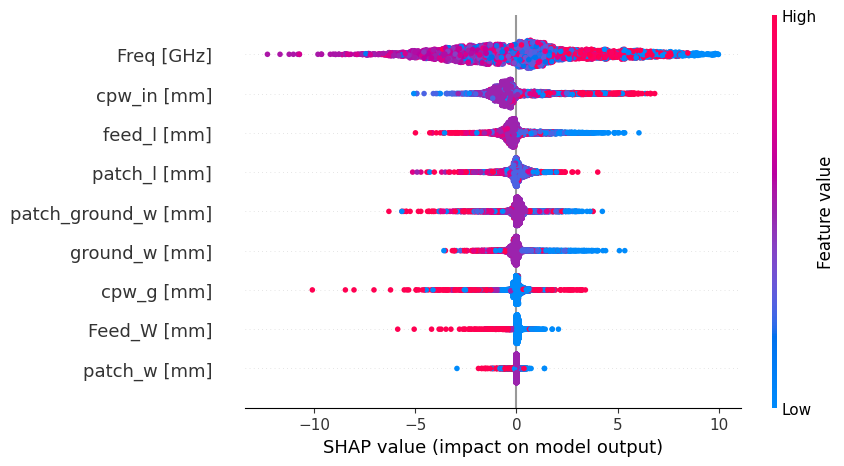

In [12]:
shap.plots.beeswarm(shap_values)

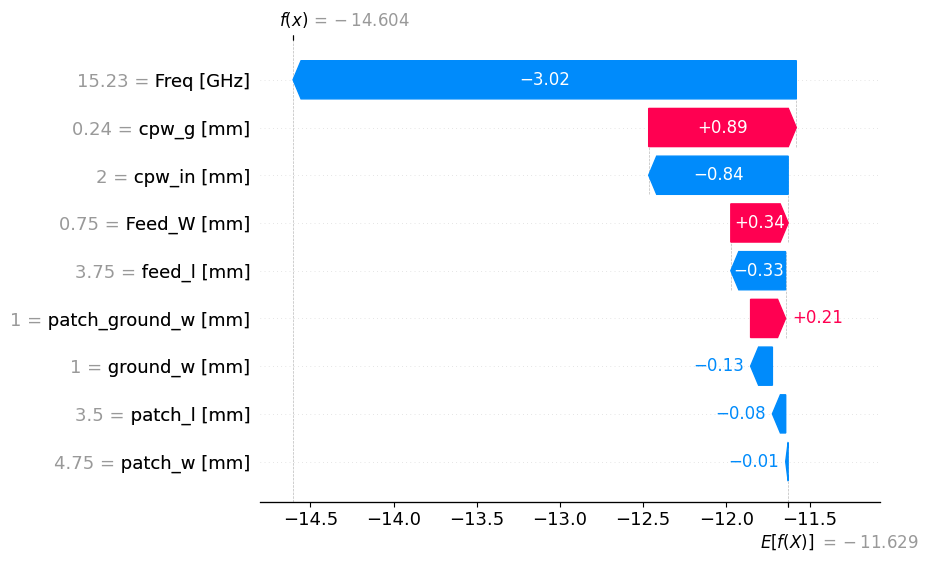

In [13]:

shap.plots.waterfall(shap_values[300])